In [2]:
import pandas as pd

In [12]:
file_path='C:/Users/lenovo/Downloads/Daily Household Transactions.csv'
Money=pd.read_csv('C:/Users/lenovo/Downloads/Daily Household Transactions.csv')
print(Money)

                     Date                   Mode        Category  \
0     20/09/2018 12:04:08                   Cash  Transportation   
1     20/09/2018 12:03:15                   Cash            Food   
2              19/09/2018  Saving Bank account 1    subscription   
3     17/09/2018 23:41:17  Saving Bank account 1    subscription   
4     16/09/2018 17:15:08                   Cash       Festivals   
...                   ...                    ...             ...   
2456             1/1/2015                   Cash  Transportation   
2457             1/1/2015                   Cash  Transportation   
2458             1/1/2015                   Cash  Transportation   
2459             1/1/2015                   Cash            Food   
2460             1/1/2015                   Cash  Transportation   

                  Subcategory                                  Note  Amount  \
0                       Train                  2 Place 5 to Place 0    30.0   
1                      sn

In [9]:
Money.head()

,Date,Mode,Category,Subcategory,Note,Amount,Income/Expense,Currency
0,20/09/2018 12:04:08,Cash,Transportation,Train,2 Place 5 to Place 0,30.0,Expense,INR
1,20/09/2018 12:03:15,Cash,Food,snacks,Idli medu Vada mix 2 plates,60.0,Expense,INR
2,19/09/2018,Saving Bank account 1,subscription,Netflix,1 month subscription,199.0,Expense,INR
3,17/09/2018 23:41:17,Saving Bank account 1,subscription,Mobile Service Provider,Data booster pack,19.0,Expense,INR
4,16/09/2018 17:15:08,Cash,Festivals,Ganesh Pujan,Ganesh idol,251.0,Expense,INR


In [5]:
Money.tail()

,Date,Mode,Category,Subcategory,Note,Amount,Income/Expense,Currency
2456,1/1/2015,Cash,Transportation,NaN,share jeep - Place T base to top,20.0,Expense,INR
2457,1/1/2015,Cash,Transportation,NaN,share auto - Place H to Place T base,20.0,Expense,INR
2458,1/1/2015,Cash,Transportation,NaN,bus - brc to Place H,30.0,Expense,INR
2459,1/1/2015,Cash,Food,NaN,tea,10.0,Expense,INR
2460,1/1/2015,Cash,Transportation,NaN,share auto - hospital to brc station,10.0,Expense,INR


In [7]:
Money.shape

(2461, 8)

In [8]:
Money.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2461 entries, 0 to 2460
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            2461 non-null   object 
 1   Mode            2461 non-null   object 
 2   Category        2461 non-null   object 
 3   Subcategory     1826 non-null   object 
 4   Note            1940 non-null   object 
 5   Amount          2461 non-null   float64
 6   Income/Expense  2461 non-null   object 
 7   Currency        2461 non-null   object 
dtypes: float64(1), object(7)
memory usage: 153.9+ KB


In [14]:
Money.isnull().sum()

Date              0
Mode              0
Category          0
Subcategory       0
Note              0
Amount            0
Income/Expense    0
Currency          0
dtype: int64

In [42]:
Money["Mode"].value_counts()

Mode
Saving Bank account 1    1215
Cash                     1045
Credit Card               162
Equity Mutual Fund B       11
Share Market Trading        5
Saving Bank account 2       5
Recurring Deposit           3
Debit Card                  2
Equity Mutual Fund C        1
Equity Mutual Fund A        1
Equity Mutual Fund D        1
Fixed Deposit               1
Name: count, dtype: int64

In [44]:
Money["Category"].value_counts()

Category
Food                         906
Transportation               307
Household                    176
subscription                 143
Other                        126
Investment                   101
Health                        94
Family                        71
Apparel                       47
Money transfer                43
Salary                        43
Recurring Deposit             41
Gift                          30
Public Provident Fund         29
Equity Mutual Fund E          22
Beauty                        22
Gpay Reward                   21
Education                     18
maid                          17
Saving Bank account 1         17
Festivals                     16
Equity Mutual Fund A          14
Equity Mutual Fund F          13
Interest                      12
Dividend earned on Shares     12
Culture                       11
Small cap fund 1              10
Small Cap fund 2              10
Share Market                   8
Maturity amount                7
L

In [46]:
Money['Subcategory'].value_counts()[lambda x: x > 1]

Subcategory
Unknown                  629
Milk                     162
auto                     142
snacks                   115
Grocery                  113
                        ... 
Wifi Internet Service      2
exam fee                   2
medicine                   2
Ganesh Pujan               2
Amazon Prime               2
Name: count, Length: 79, dtype: int64

In [12]:
Money['Subcategory'] = Money['Subcategory'].fillna('Unknown')

In [13]:
Money['Note'] = Money['Note'].fillna('Unknown')

In [41]:
Money.drop_duplicates(inplace=True)

# =============================================================================
# Function: plot_top_n_modes
# -----------------------------------------------------------------------------
# Description:
# This function creates a bar plot showing the top N most frequent categories
# in a specified column of a DataFrame using Seaborn's countplot.
#
# Parameters:
# - df (DataFrame): The input DataFrame.
# - column (str): The column name to analyze and plot (default is "Mode").
# - top_n (int): The number of top categories to display (default is 3).
# - colors (list or None): A list of custom colors for the bars. If not provided,
#   a default Seaborn palette (Set2) with N colors is used.
#
# Function Logic:
# 1. It identifies the top N most frequent values in the selected column.
# 2. Filters the DataFrame to only include rows with those top N values.
# 3. Uses Seaborn to create a countplot with custom colors.
# 4. Assigns the column to both `x` and `hue` to ensure proper coloring
#    and eliminates legend clutter by setting `legend=False`.
#
# Why it's useful:
# - Automatically handles filtering and avoids color mismatch warnings.
# - Useful for quickly visualizing the most common categories.
# - Produces clean, informative bar plots with minimal setup.
# =============================================================================


In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_top_n_modes(Money, column="Mode", top_n=6, colors=None):
    top_values = Money[column].value_counts().iloc[:top_n].index
    Money_top = Money[Money[column].isin(top_values)]

    if colors is None:
        colors = sns.color_palette("Set2", n_colors=top_n)

    plt.figure(figsize=(12, 8))
    sns.countplot(
        data=Money_top,
        x=column,
        hue=column,
        order=top_values,
        palette=colors,
        legend=False
    )
    plt.title(f"Top {top_n} '{column}' Categories")
    plt.show()

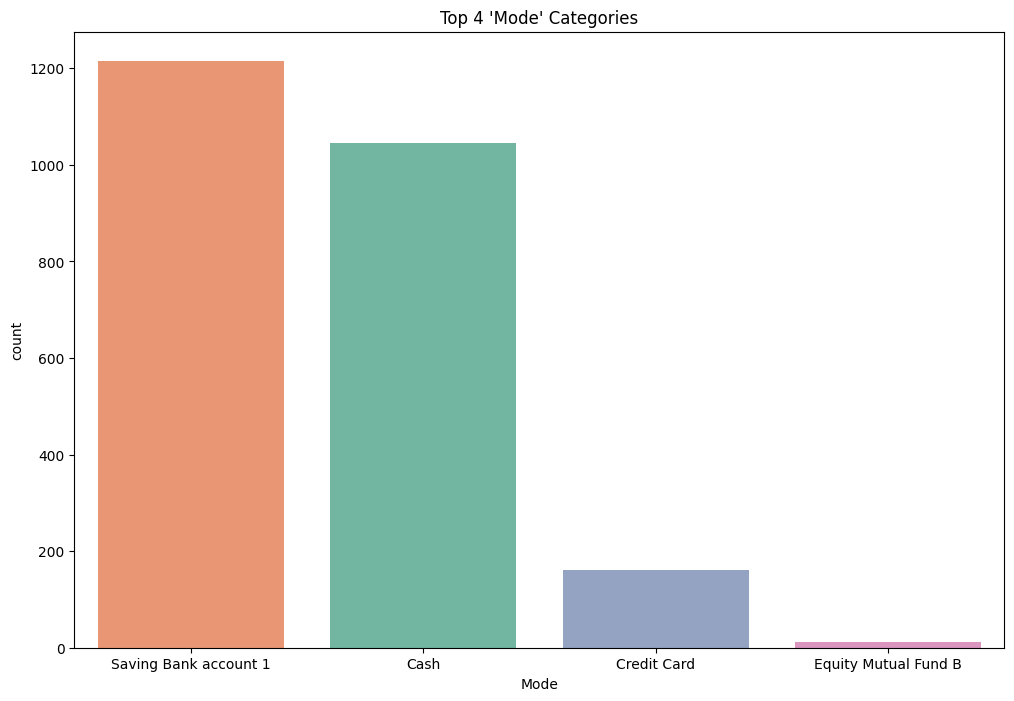

In [40]:
plot_top_n_modes(Money, column="Mode", top_n=4)

 ● Summarystatistics.
 ● Distributionof transactionamounts.
 ● Transactioncountsbycategoryandtype

In [9]:
%pip install matplotlib.pyplot
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement matplotlib.pyplot (from versions: none)

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: No matching distribution found for matplotlib.pyplot


  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ------- -------------------------------- 1.6/8.1 MB 7.5 MB/s eta 0:00:01
   --------------- ------------------------ 3.1/8.1 MB 7.2 MB/s eta 0:00:01
   ----------------------- ---------------- 4.7/8.1 MB 7.4 MB/s eta 0:00:01
   -------------------------------- ------- 6.6/8.1 MB 7.5 MB/s eta 0:00:01
   ---------------------------------------  7.9/8.1 MB 7.2 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 7.0 MB/s eta 0:00:00
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ----------------------- ---------------- 1.3/2.2 MB 21.1 MB/s eta 0:00:01
   ---------------------------------------- 2.2/2.2 MB 8.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.7 MB ? eta -:--:--
   --------------- ------------------------ 1.0/2.7 MB 6.9 MB/s eta


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

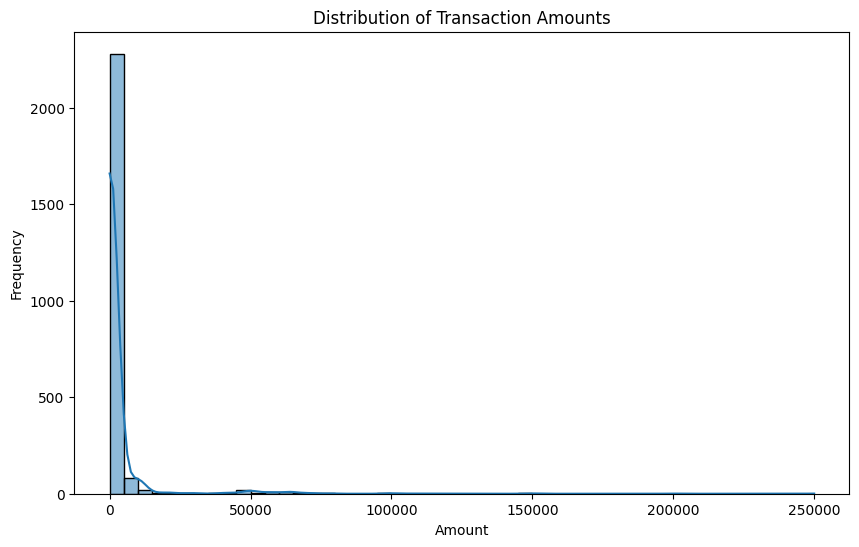

In [12]:
# Summary statistics
Money.describe()

# Distribution of transaction amounts
plt.figure(figsize=(10, 6))
sns.histplot(Money['Amount'], bins=50, kde=True)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()


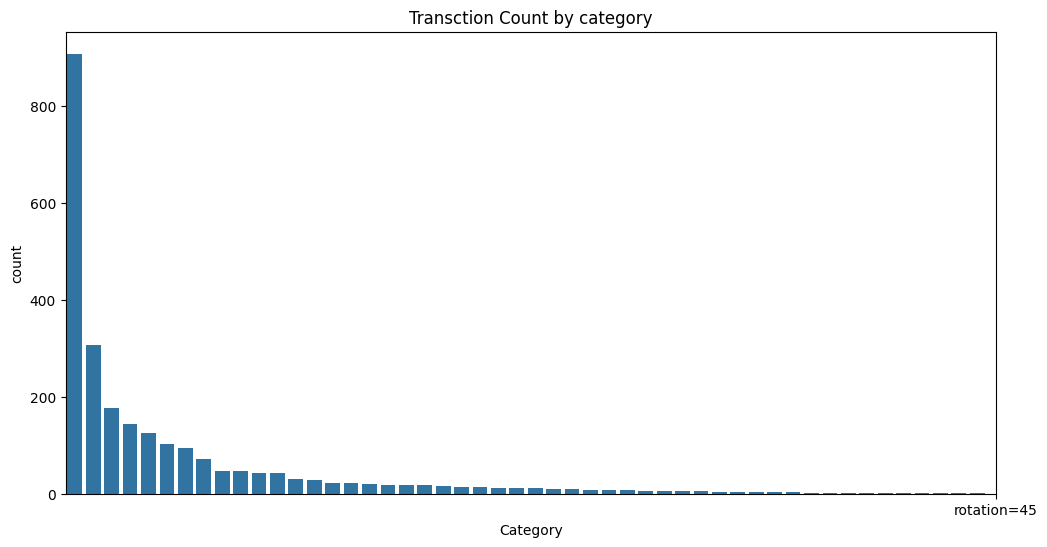

In [18]:
#Transactioncountsbycategory
plt.figure(figsize = (12,6))
sns. countplot(data=Money, x='Category', order= Money['Category'].value_counts().index)
plt.title('Transction Count by category')
plt.xlabel('Category')
plt.ylabel('count')
plt.xticks('rotation=45')
plt.show()           

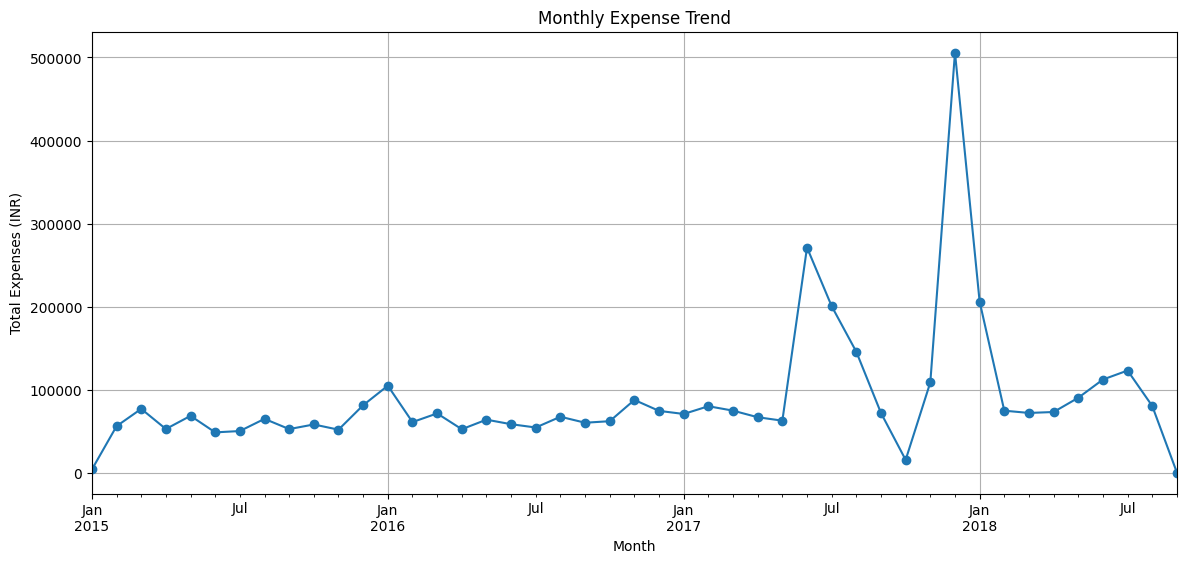

In [21]:
# Convert 'Date' to datetime
Money['Date'] = pd.to_datetime(Money['Date'], errors='coerce')

# Extract year and month
Money['YearMonth'] = Money['Date'].dt.to_period('M')

monthly_expenses = Money.groupby('YearMonth')['Amount'].sum()

plt.figure(figsize=(14, 6))
monthly_expenses.plot(kind='line', marker='o')
plt.title('Monthly Expense Trend')
plt.xlabel('Month')
plt.ylabel('Total Expenses (INR)')
plt.grid(True)
plt.show()

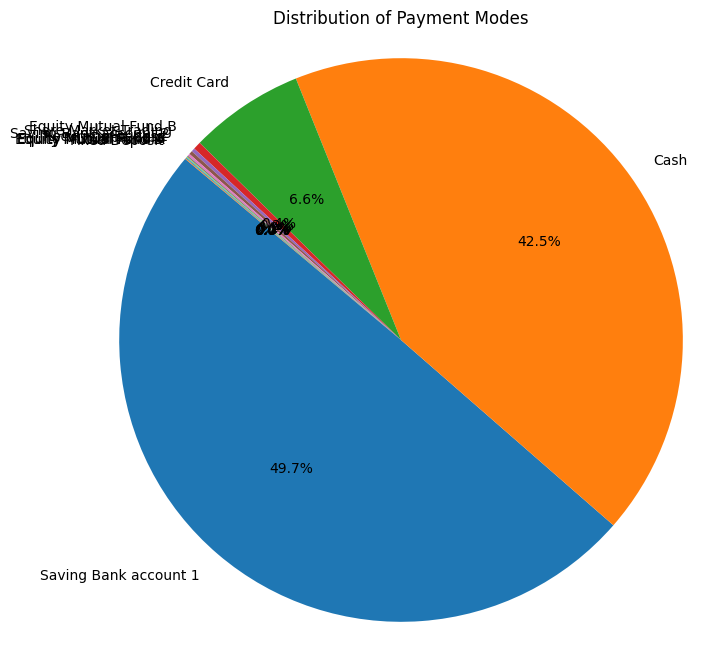

In [22]:
mode_counts = Money['Mode'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(mode_counts, labels=mode_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Payment Modes')
plt.axis('equal')
plt.show()


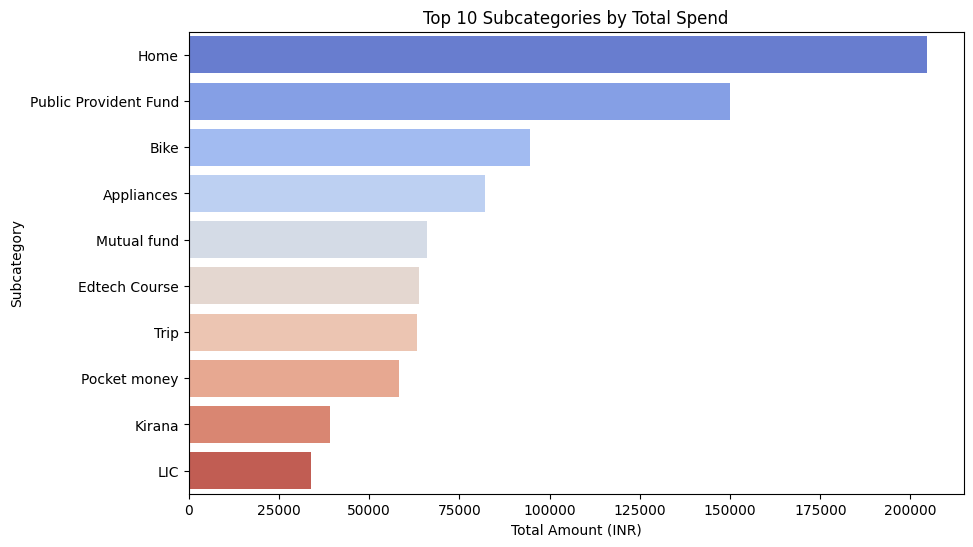

In [24]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top_subs.values, y=top_subs.index, hue=top_subs.index, palette='coolwarm', legend=False)
plt.title('Top 10 Subcategories by Total Spend')
plt.xlabel('Total Amount (INR)')
plt.ylabel('Subcategory')
plt.show()


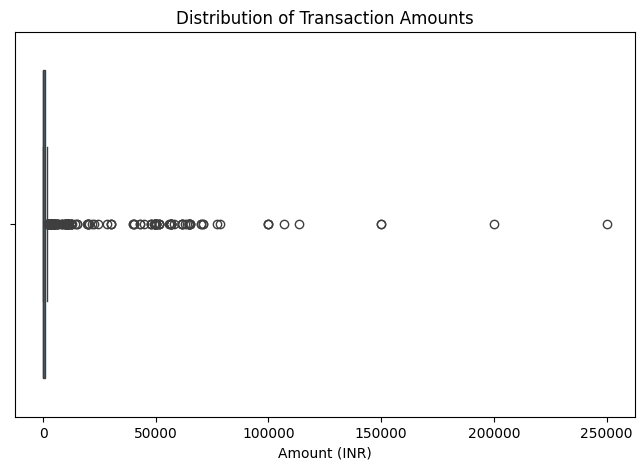

In [26]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=Money['Amount'])
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Amount (INR)')
plt.show()


<Axes: xlabel='DayOfWeek', ylabel='Amount'>

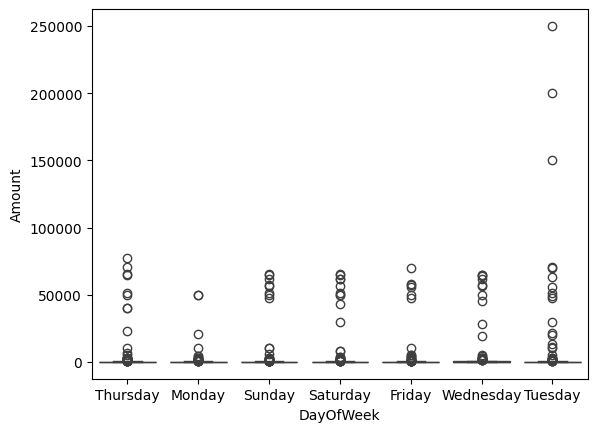

In [27]:
Money['DayOfWeek'] = Money['Date'].dt.day_name()
sns.boxplot(x='DayOfWeek', y='Amount', data=Money)


<Axes: xlabel='YearMonth'>

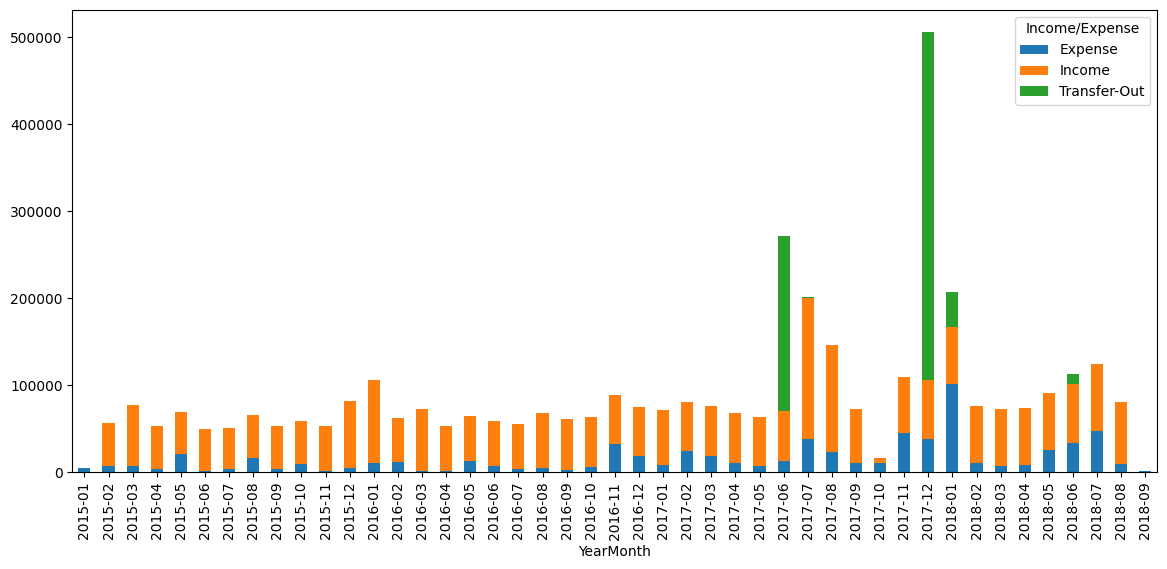

In [28]:
monthly_trend = Money.groupby(['YearMonth', 'Income/Expense'])['Amount'].sum().unstack()
monthly_trend.plot(kind='bar', stacked=True, figsize=(14, 6))


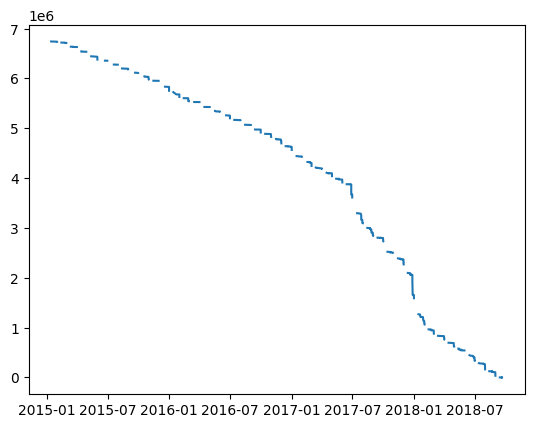

In [30]:
Money['Cumulative'] = Money['Amount'].cumsum()
plt.plot(Money['Date'], Money['Cumulative'])


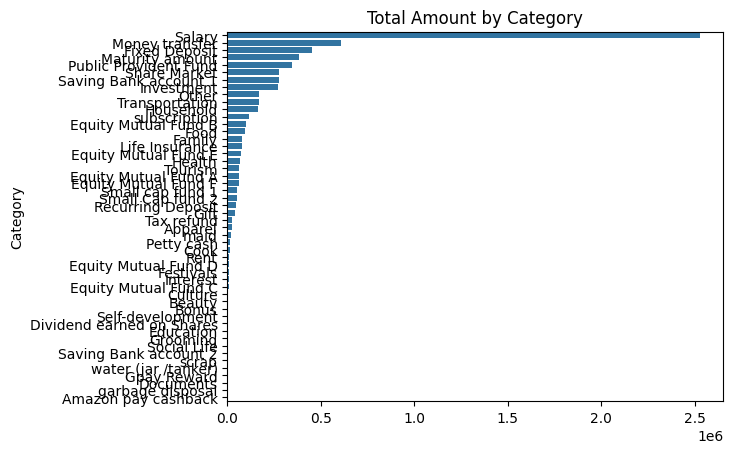

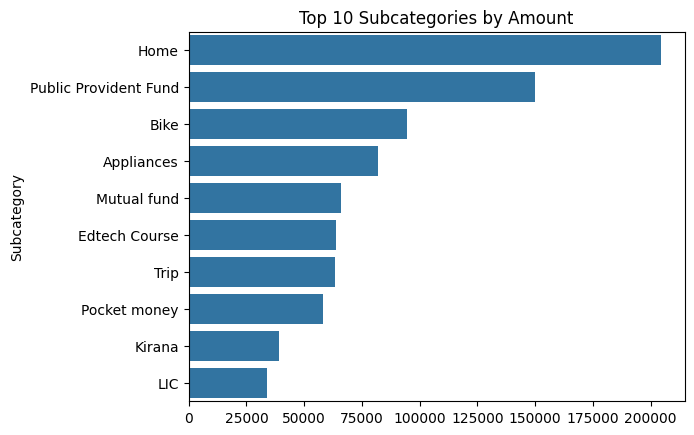

In [15]:
# Category Total
category_sum = Money.groupby('Category')['Amount'].sum().sort_values(ascending=False)
sns.barplot(x=category_sum.values, y=category_sum.index)
plt.title('Total Amount by Category')
plt.show()

# Subcategory Top 10
top_sub = Money.groupby('Subcategory')['Amount'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=top_sub.values, y=top_sub.index)
plt.title('Top 10 Subcategories by Amount')
plt.show()


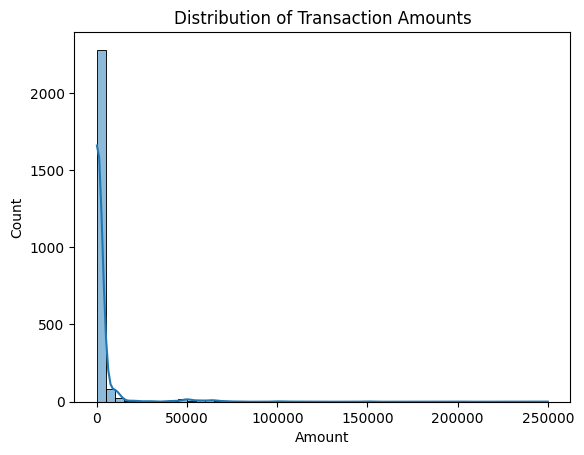

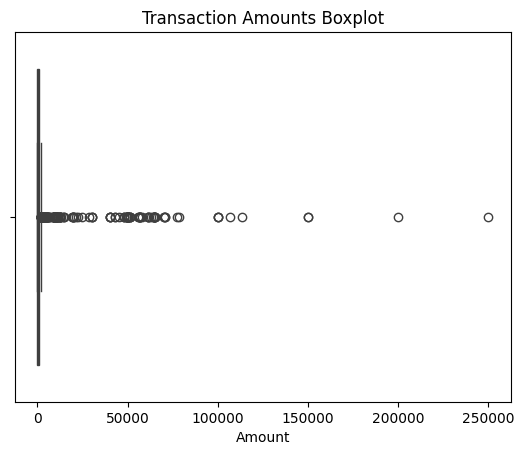

In [16]:
sns.histplot(Money['Amount'], bins=50, kde=True)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Amount')
plt.show()

sns.boxplot(x=Money['Amount'])
plt.title('Transaction Amounts Boxplot')
plt.show()


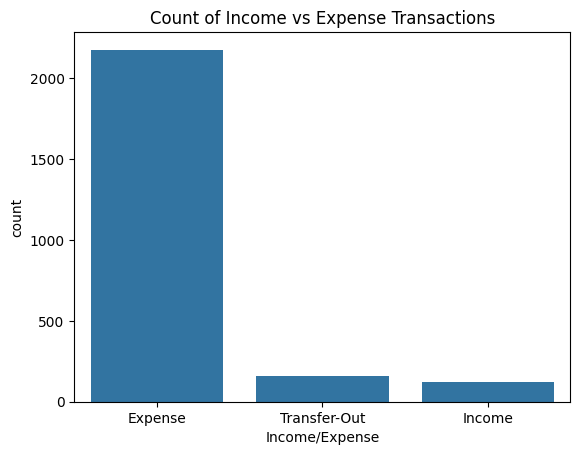

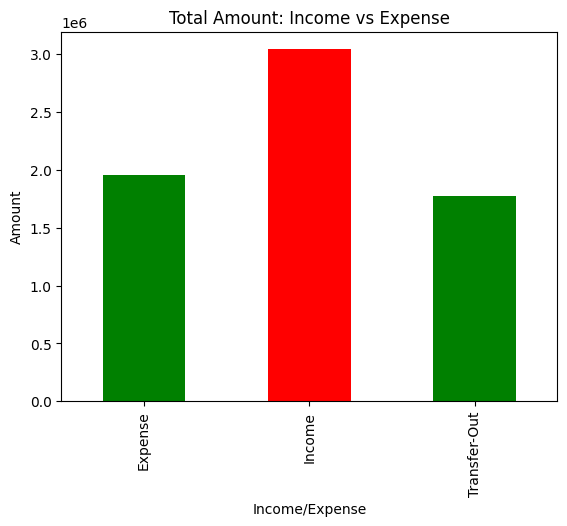

In [17]:
# Count
sns.countplot(x='Income/Expense', data=Money)
plt.title('Count of Income vs Expense Transactions')
plt.show()

# Total Amount
income_expense_total = Money.groupby('Income/Expense')['Amount'].sum()
income_expense_total.plot(kind='bar', color=['green', 'red'])
plt.title('Total Amount: Income vs Expense')
plt.ylabel('Amount')
plt.show()


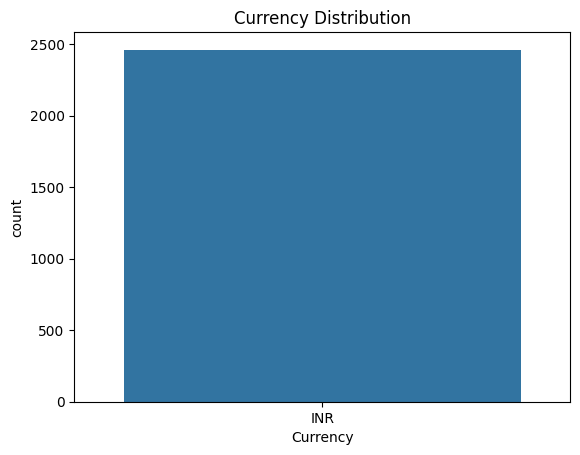

In [18]:
sns.countplot(x='Currency', data=Money)
plt.title('Currency Distribution')
plt.show()


In [19]:
pd.pivot_table(Money, 
               values='Amount', 
               index='Category', 
               columns='Income/Expense', 
               aggfunc='sum', 
               fill_value=0)


Income/Expense,Expense,Income,Transfer-Out
Category,,,
Amazon pay cashback,0.00,23.00,0.00
Apparel,25373.82,0.00,0.00
Beauty,4189.00,0.00,0.00
Bonus,0.00,3026.00,0.00
Cook,12443.00,0.00,0.00
Culture,4304.36,0.00,0.00
Dividend earned on Shares,0.00,876.75,0.00
Documents,100.00,0.00,0.00
Education,537.00,0.00,0.00


In [20]:
pivot_category = pd.pivot_table(Money, 
                                 values='Amount', 
                                 index='Category', 
                                 columns='Income/Expense', 
                                 aggfunc='sum', 
                                 fill_value=0)
print(pivot_category)


Income/Expense               Expense      Income  Transfer-Out
Category                                                      
Amazon pay cashback             0.00       23.00          0.00
Apparel                     25373.82        0.00          0.00
Beauty                       4189.00        0.00          0.00
Bonus                           0.00     3026.00          0.00
Cook                        12443.00        0.00          0.00
Culture                      4304.36        0.00          0.00
Dividend earned on Shares       0.00      876.75          0.00
Documents                     100.00        0.00          0.00
Education                     537.00        0.00          0.00
Equity Mutual Fund A            0.00        0.00      63000.00
Equity Mutual Fund B            0.00        0.00     100000.00
Equity Mutual Fund C            0.00        0.00       6000.00
Equity Mutual Fund D            0.00        0.00      10000.00
Equity Mutual Fund E            0.00        0.00      7

In [21]:
pivot_mode = pd.pivot_table(Money, 
                             values='Amount', 
                             index='Mode', 
                             columns='Income/Expense', 
                             aggfunc='sum', 
                             fill_value=0)
print(pivot_mode)


Income/Expense            Expense      Income  Transfer-Out
Mode                                                       
Cash                    173431.00     2821.00          0.00
Credit Card             205254.01        0.00          0.00
Debit Card                 942.36        0.00          0.00
Equity Mutual Fund A         0.00   113376.00          0.00
Equity Mutual Fund B         0.00        0.00      22000.00
Equity Mutual Fund C         0.00     6049.00          0.00
Equity Mutual Fund D         0.00   106875.00          0.00
Fixed Deposit                0.00        0.00     150000.00
Recurring Deposit            0.00    94738.00          0.00
Saving Bank account 1  1577728.46  2717820.20    1495982.33
Saving Bank account 2       34.70      718.15          0.00
Share Market Trading         0.00        0.00     102798.57


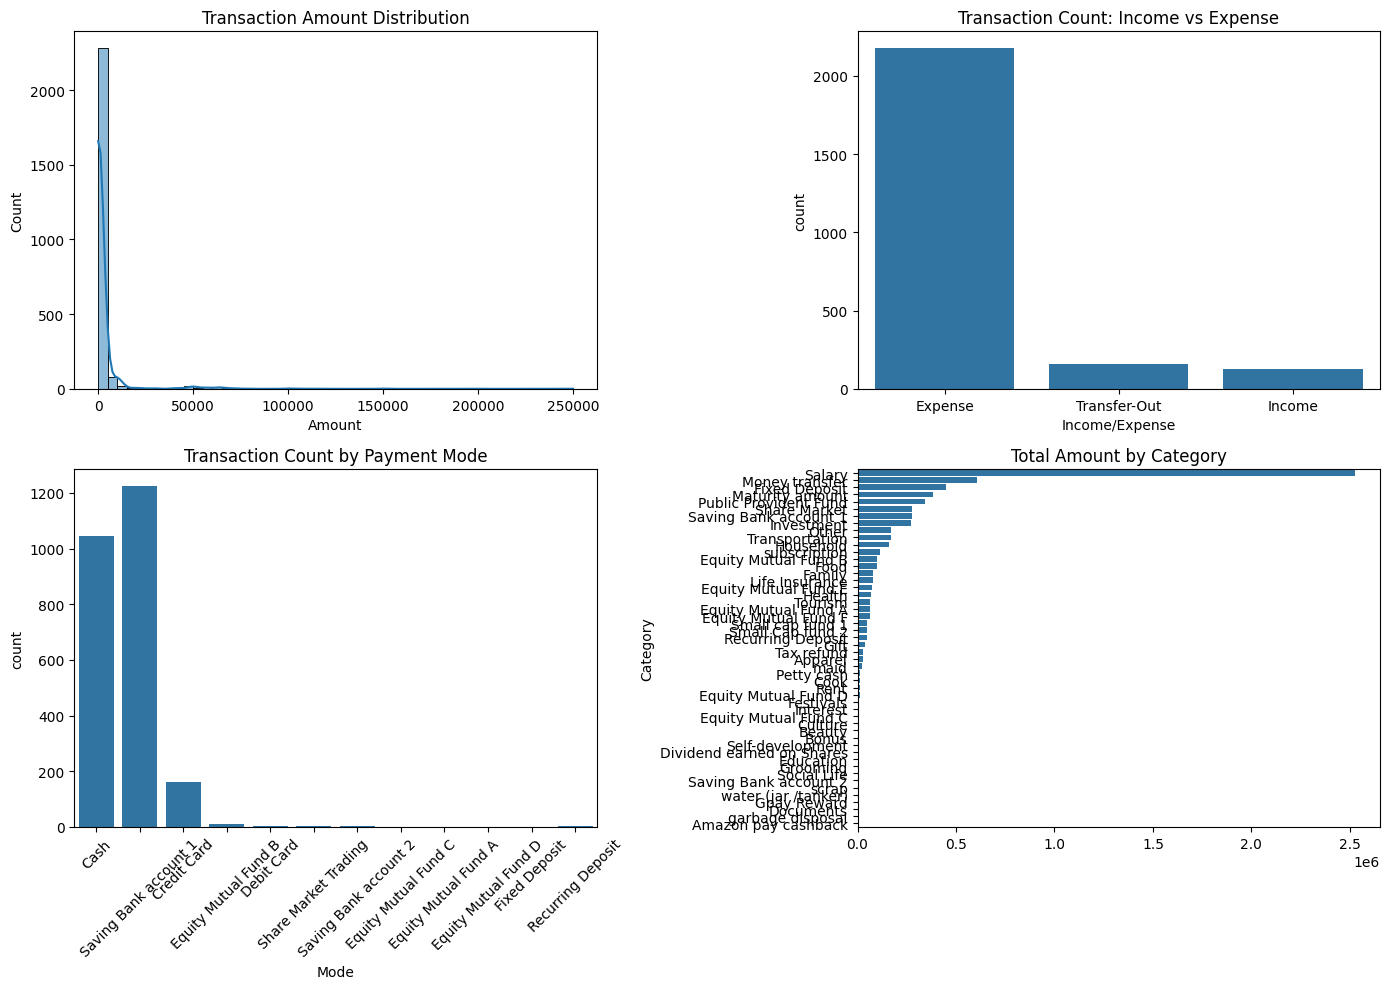

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(2, 2, figsize=(14, 10))  # 2 rows, 2 columns

# 1st Plot: Transaction Amount Distribution
sns.histplot(Money['Amount'], bins=50, kde=True, ax=axs[0, 0])
axs[0, 0].set_title('Transaction Amount Distribution')

# 2nd Plot: Count of Income vs Expense
sns.countplot(x='Income/Expense', data=Money, ax=axs[0, 1])
axs[0, 1].set_title('Transaction Count: Income vs Expense')

# 3rd Plot: Spend by Payment Mode
sns.countplot(x='Mode', data=Money, ax=axs[1, 0])
axs[1, 0].set_title('Transaction Count by Payment Mode')
axs[1, 0].tick_params(axis='x', rotation=45)

# 4th Plot: Total by Category
category_total = Money.groupby('Category')['Amount'].sum().sort_values(ascending=False)
sns.barplot(x=category_total.values, y=category_total.index, ax=axs[1, 1])
axs[1, 1].set_title('Total Amount by Category')

plt.tight_layout()
plt.show()


# ✅ Final Comments

- This project successfully explored a household's daily financial data using exploratory data analysis (EDA).
- Key trends in spending behavior, preferred payment methods, and category-wise expenditures were identified.
- Data cleaning and preprocessing were crucial to ensure consistency and accuracy in analysis.
- Visualizations helped translate raw numbers into understandable financial insights.
- Pivot tables allowed deeper comparisons across income and expense categories.
- The project lays a strong foundation for developing a personal finance tracker or dashboard.
- Future extensions could include predictive modeling, alert systems, or spending recommendations using machine learning.


# Visualizations
- Visualizations played a crucial role in this project by making patterns in spending and income easy to understand at a glance.
- Bar plots and count plots helped highlight the most frequent spending categories and preferred payment modes.
- Histograms revealed the distribution of transaction amounts, showing how most daily expenses fall within a common range.
- Monthly trend graphs provided a time-based overview of financial behavior, helping identify spikes or drops in spending.
- A word cloud from the 'Note' column gave a creative look at frequently used terms, adding qualitative context to the data.
- Using multiple plots in a single frame improved comparison across categories and made the EDA more interactive and organized.
- Each visualization was chosen based on the type of data and the insights needed — from categorical comparisons to trend analysis.
